In [21]:
pip install gym

Note: you may need to restart the kernel to use updated packages.


C:\Users\Yumi\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Final Q-table:
[[ 9.41  9.51  9.32  9.41]
 [ 9.41 -1.    5.91  8.95]
 [ 8.95  0.    0.    0.  ]
 [ 0.   -0.96  0.    0.  ]
 [ 9.51  9.61 -1.    9.41]
 [ 0.    0.    0.    0.  ]
 [-0.96  9.8  -0.99  0.  ]
 [ 0.    0.    0.    0.  ]
 [ 9.61 -1.    9.7   9.51]
 [ 9.61  9.8   9.8  -1.  ]
 [ 9.7   9.9  -1.    9.7 ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [-1.    9.8   9.9   9.7 ]
 [ 9.8   9.9  10.    9.8 ]
 [ 0.    0.    0.    0.  ]]


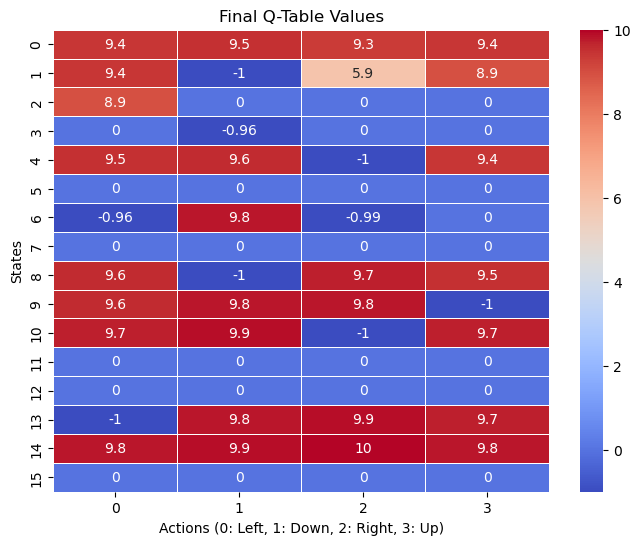

In [22]:
import gym
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize FrozenLake environment
env = gym.make("FrozenLake-v1", is_slippery=False)

# Initialize Q-table
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters
rho = 0.8       # Learning rate
gamma = 0.99    # Discount factor
epsilon = 0.1   # Exploration rate
n_episode = 2000
length_episode = 100

# Training loop
for i in range(n_episode):
    s, _ = env.reset()  # ✅ Fix: Extract state from tuple
    for j in range(length_episode):
        # Epsilon-greedy policy
        if np.random.rand() < epsilon:
            a = env.action_space.sample()  # Explore
        else:
            argmaxs = np.argwhere(Q[s, :] == np.amax(Q[s, :])).flatten().tolist()
            a = np.random.choice(argmaxs)  # Exploit

        s1, r, done, _, _ = env.step(a)

        # Reward tuning: Encourage learning
        if done and r == 0:
            r = -1  # Penalize falling into a hole
        elif done and r == 1:
            r = 10  # Reward for reaching the goal

        # Q-learning update rule
        Q[s, a] = Q[s, a] + rho * (r + gamma * np.max(Q[s1, :]) - Q[s, a])

        s = s1
        if done:
            break

# Print final Q-table
np.set_printoptions(precision=2)
print("Final Q-table:")
print(Q)

# Visualize Q-table as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Q, annot=True, cmap="coolwarm", linewidths=0.5)
plt.xlabel("Actions (0: Left, 1: Down, 2: Right, 3: Up)")
plt.ylabel("States")
plt.title("Final Q-Table Values")
plt.show()
